In [2]:
import os, logging, gc
from time import time
import pandas as pd
import numpy as np
import time

pd.set_option("display.max_columns", 50)

import warnings

warnings.filterwarnings(action='ignore')

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 15, 8

seed = 515
np.random.seed(seed)

In [3]:
def missing_values_table(df):
    #
    # Function to explore how many missing values (NaN) in the dataframe against its size
    # Args:
    #   df: the input dataframe for analysis
    #
    # Return:
    #   mis_val_table_ren_columns: dataframe table contains the name of columns with missing data, # of missing values and % of missing against total
    #
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns and rows of " + str(df.shape[0]) + ".\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.\n")
    return mis_val_table_ren_columns


def read_data(filename, nrows=10):
    #
    # Function to read the csv file onto the panda dataframe
    # Args:
    #   filename: The name of csv file
    #   nrows: number of rows to be read. Default is 10 rows. None will read all rows
    #
    # Return:
    #  df: panda dataframe containing the data from csv file
    #
    if(os.path.isfile(filename)):
        print("\nReading file:: {}\n".format(filename))
        df = pd.read_csv(filename, sep = ',', nrows = nrows)
        df.columns = [x.lower() for x in df.columns]
        print("\n=======================================================================")
        print("Sample records: \n", df.head(2))
        print("\n=======================================================================")
        print("The data type: \n", df.columns.to_series().groupby(df.dtypes).groups)
        print("\n=======================================================================")
        print("Checking missing data (NaN): \n", missing_values_table(df))

    else:
        logging.warning("File is not existed")
        df = None

    return df


def one_way_tab (df, col):
    #
    # Function to compute one way table
    # Args:
    #   df: pandas dataframe
    #   col: column name to tabulate
    #
    # Return:
    #   df: the tabulate pandas of the outcome
    #
    sns.countplot(x = col, data = df)
    plt.show();
    df = pd.crosstab(index = df[col], columns = "count")
    df['percent'] = df/df.sum() * 100
    return df

In [4]:
data_file = "/content/drive/MyDrive/CSV/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = read_data(data_file, nrows = None)


Reading file:: /content/drive/MyDrive/CSV/WA_Fn-UseC_-Telco-Customer-Churn.csv


Sample records: 
    customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      multiplelines internetservice onlinesecurity onlinebackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   

  deviceprotection techsupport streamingtv streamingmovies        contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   

  paperlessbilling     paymentmethod  monthlycharges totalcharges churn  
0              Yes  Electronic check           29.85        29.85    No  
1               No      Mailed check           56.95       1889.5    No  


In [5]:
display(df.head(5))

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


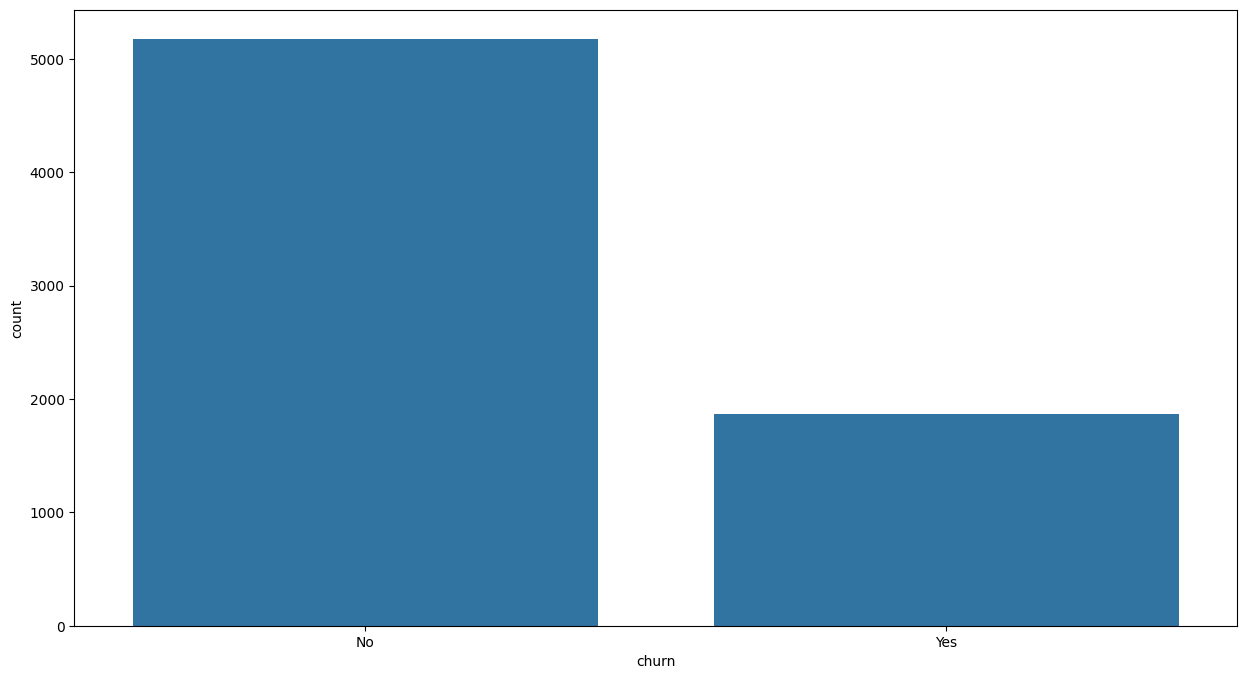

col_0,count,percent
churn,,
No,5174,73.463013
Yes,1869,26.536987


In [6]:
one_way_tab(df, 'churn')